In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [112]:
df = pd.read_csv("music.csv")
print(df.head())
print("\nDataset shape:", df.shape)
print("\nGenre distribution:\n", df['label'].value_counts())


          filename  chroma_stft      rmse  spectral_centroid  \
0  blues.00000.wav     0.349943  0.130225        1784.420446   
1  blues.00001.wav     0.340983  0.095918        1529.835316   
2  blues.00002.wav     0.363603  0.175573        1552.481958   
3  blues.00003.wav     0.404779  0.141191        1070.119953   
4  blues.00004.wav     0.308590  0.091563        1835.494603   

   spectral_bandwidth      rolloff  zero_crossing_rate       mfcc1  \
0         2002.650192  3806.485316            0.083066 -113.596748   
1         2038.617579  3548.820207            0.056044 -207.556793   
2         1747.165985  3040.514948            0.076301  -90.754387   
3         1596.333948  2185.028454            0.033309 -199.431152   
4         1748.362448  3580.945013            0.101500 -160.266037   

        mfcc2      mfcc3  ...    mfcc12    mfcc13    mfcc14    mfcc15  \
0  121.557297 -19.158825  ...  8.810669 -3.667368  5.751691 -5.162763   
1  124.006721   8.930560  ...  5.376803 -2.23912

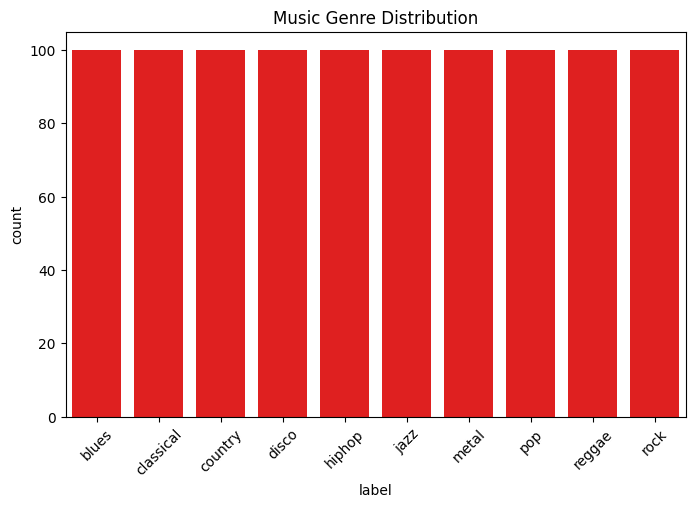

In [140]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='label', color='red')
plt.title("Music Genre Distribution")
plt.xticks(rotation=45)
plt.show()


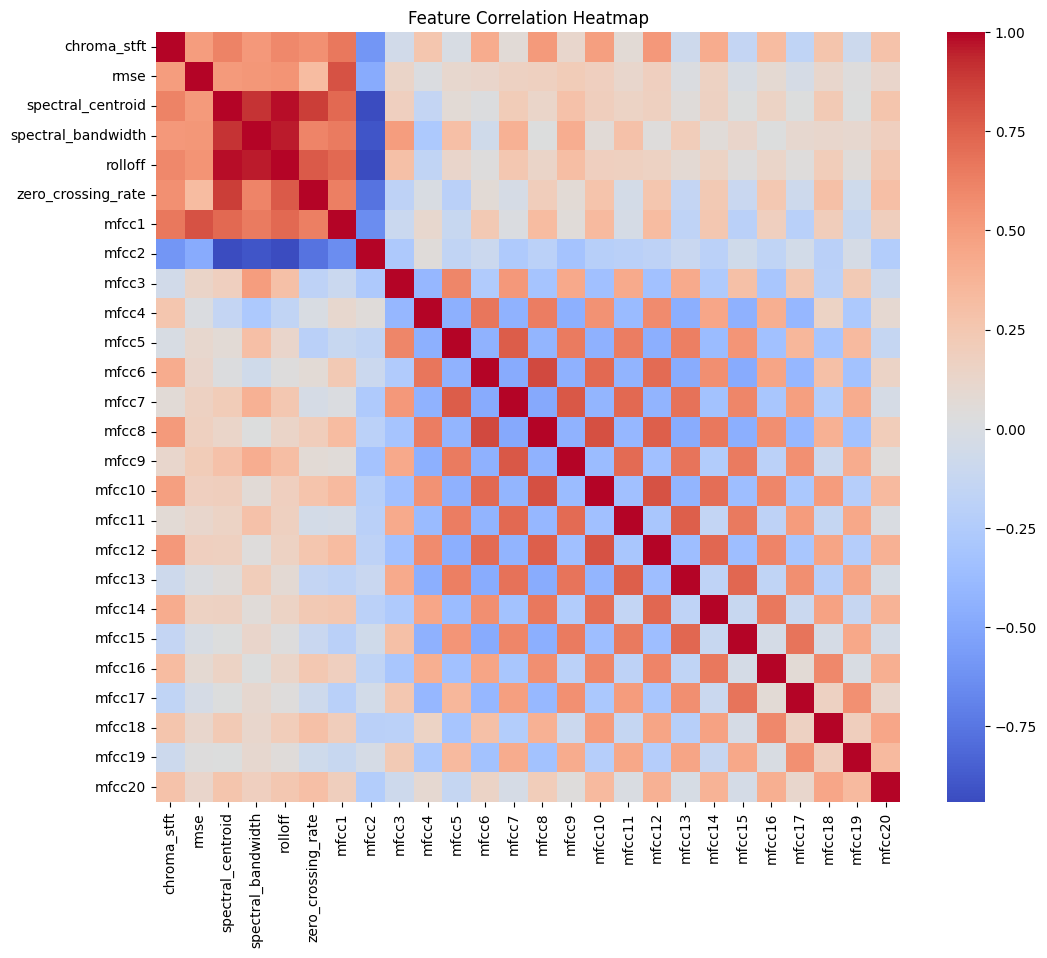

In [128]:
plt.figure(figsize=(12,10))
sns.heatmap(df.drop(['filename', 'label'], axis=1).corr(), cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [118]:
# Features (drop filename and label)
X = df.drop(['filename', 'label'], axis=1)
y = df['label']

# Encode labels to numeric
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [102]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.665

Classification Report:
               precision    recall  f1-score   support

       blues       0.61      0.70      0.65        20
   classical       0.86      0.95      0.90        20
     country       0.57      0.60      0.59        20
       disco       0.89      0.40      0.55        20
      hiphop       0.48      0.65      0.55        20
        jazz       0.64      0.70      0.67        20
       metal       0.81      0.85      0.83        20
         pop       0.60      0.75      0.67        20
      reggae       0.62      0.50      0.56        20
        rock       0.79      0.55      0.65        20

    accuracy                           0.67       200
   macro avg       0.69      0.66      0.66       200
weighted avg       0.69      0.67      0.66       200



In [120]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [122]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.665

Classification Report:
               precision    recall  f1-score   support

       blues       0.61      0.70      0.65        20
   classical       0.86      0.95      0.90        20
     country       0.57      0.60      0.59        20
       disco       0.89      0.40      0.55        20
      hiphop       0.48      0.65      0.55        20
        jazz       0.64      0.70      0.67        20
       metal       0.81      0.85      0.83        20
         pop       0.60      0.75      0.67        20
      reggae       0.62      0.50      0.56        20
        rock       0.79      0.55      0.65        20

    accuracy                           0.67       200
   macro avg       0.69      0.66      0.66       200
weighted avg       0.69      0.67      0.66       200



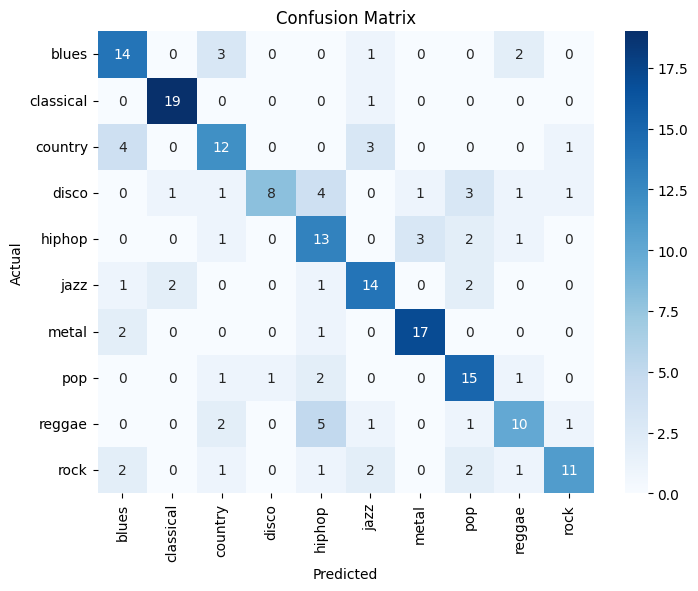

In [124]:
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()


In [142]:
# Example: predict first sample from test set
sample = X_test[18].reshape(1, -1)
predicted_genre = le.inverse_transform(model.predict(sample))[0]
print("Predicted Genre:", predicted_genre)


Predicted Genre: pop
